In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.plotly import iplot
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='roy.mansoor', api_key='NZJwIxMFv6TRWEAZDmRX')
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords



import matplotlib.gridspec as gridspec
from datetime import datetime
import seaborn as sns

import re
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
init_notebook_mode(connected=True)

import os


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('./employee_reviews.csv')

In [3]:
df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [4]:
df.shape

(67529, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

In [6]:
(df['carrer-opportunities-stars']=='none').sum()

7108

In [7]:
#df[['overall-ratings', 'work-balance-stars', 'culture-values-stars',
#            'carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars']]=df[['overall-ratings', 'work-balance-stars', 'culture-values-stars',
#            'carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars']].astype(float#)

In [8]:
df.dtypes

Unnamed: 0                      int64
company                        object
location                       object
dates                          object
job-title                      object
summary                        object
pros                           object
cons                           object
advice-to-mgmt                 object
overall-ratings               float64
work-balance-stars             object
culture-values-stars           object
carrer-opportunities-stars     object
comp-benefit-stars             object
senior-mangemnet-stars         object
helpful-count                   int64
link                           object
dtype: object

In [9]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [10]:
df.drop(columns='link', axis=1, inplace=True)

In [11]:
df.drop(columns='location', axis=1, inplace=True)

In [12]:
df.drop(columns='dates', axis=1, inplace=True)

In [13]:
df.drop(columns='job-title', axis=1, inplace=True)

In [14]:
df.columns = df.columns.str.replace('-','_')

In [15]:
#courts_data['cents'] = courts_data['cents'].astype('str')

In [16]:
df['overall_ratings']= df['overall_ratings'].astype('int')

In [17]:
#df['work_balance_stars']= df['work_balance_stars'].astype('int')

In [18]:
df.head()

,company,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count
0,google,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4.0,5.0,5.0,4.0,5.0,0
1,google,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2.0,3.0,3.0,5.0,3.0,2094
2,google,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5.0,4.0,5.0,5.0,4.0,949
3,google,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2.0,5.0,5.0,4.0,5.0,498
4,google,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5.0,5.0,5.0,5.0,5.0,49


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 12 columns):
company                       67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice_to_mgmt                67232 non-null object
overall_ratings               67529 non-null int64
work_balance_stars            67529 non-null object
culture_values_stars          67529 non-null object
carrer_opportunities_stars    67529 non-null object
comp_benefit_stars            67529 non-null object
senior_mangemnet_stars        67529 non-null object
helpful_count                 67529 non-null int64
dtypes: int64(2), object(10)
memory usage: 6.2+ MB


In [20]:
df['company'].value_counts()

amazon       26430
microsoft    17930
apple        12950
google        7819
facebook      1590
netflix        810
Name: company, dtype: int64

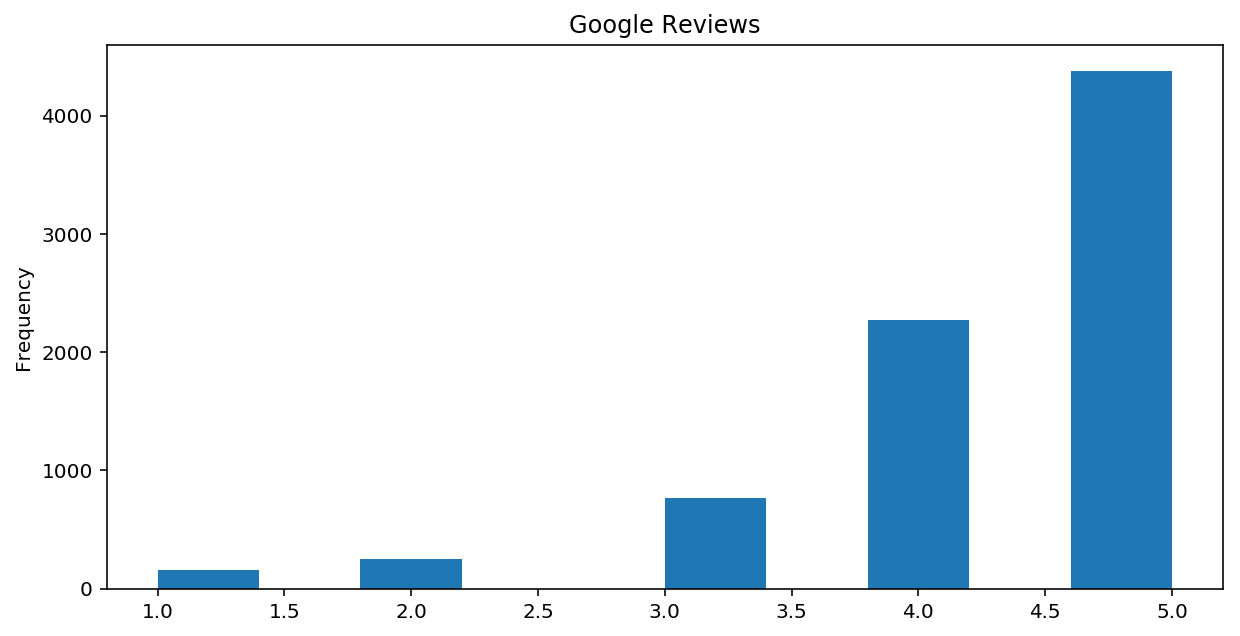

In [21]:
plt.figure(figsize=(10,5))
plt.title('Google Reviews')
df[df['company'] == 'google']['overall_ratings'].plot(kind="hist");

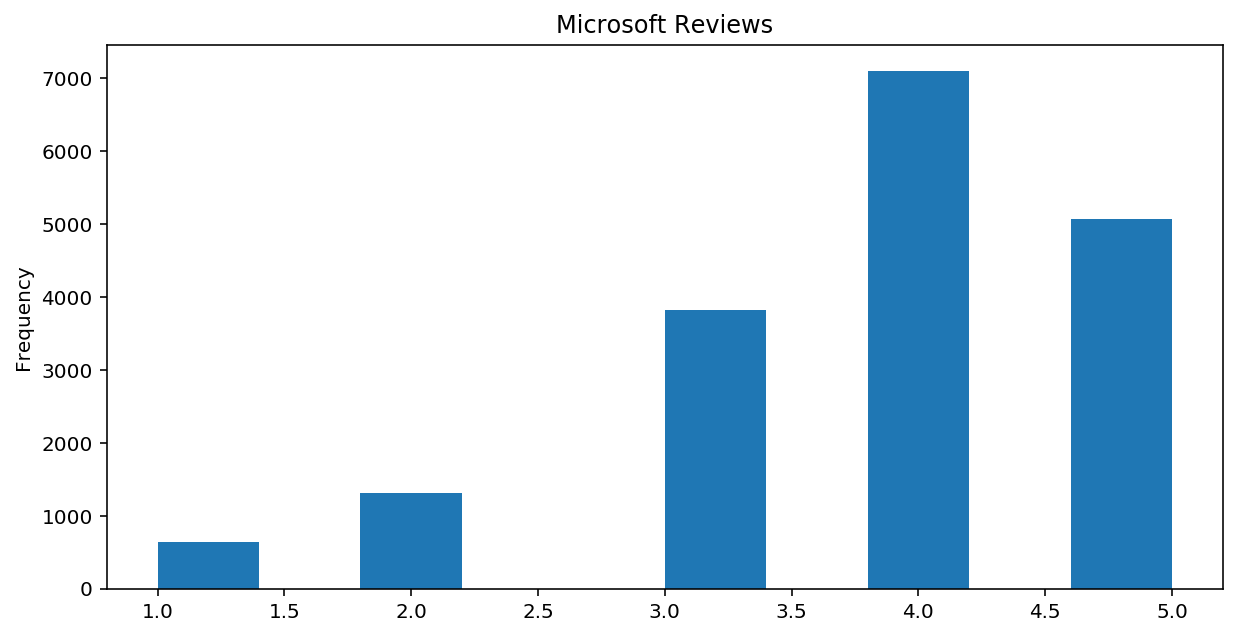

In [22]:
plt.figure(figsize=(10,5))
plt.title('Microsoft Reviews')
df[df['company'] == 'microsoft']['overall_ratings'].plot(kind="hist");

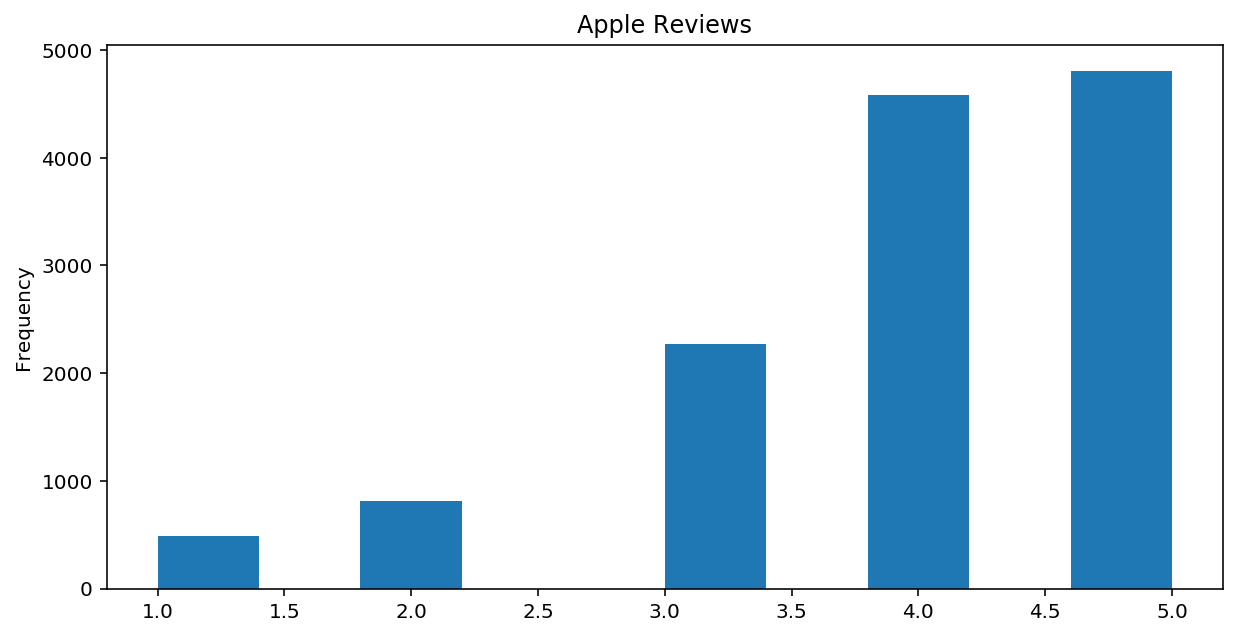

In [23]:
plt.figure(figsize=(10,5))
plt.title('Apple Reviews')
df[df['company'] == 'apple']['overall_ratings'].plot(kind="hist");

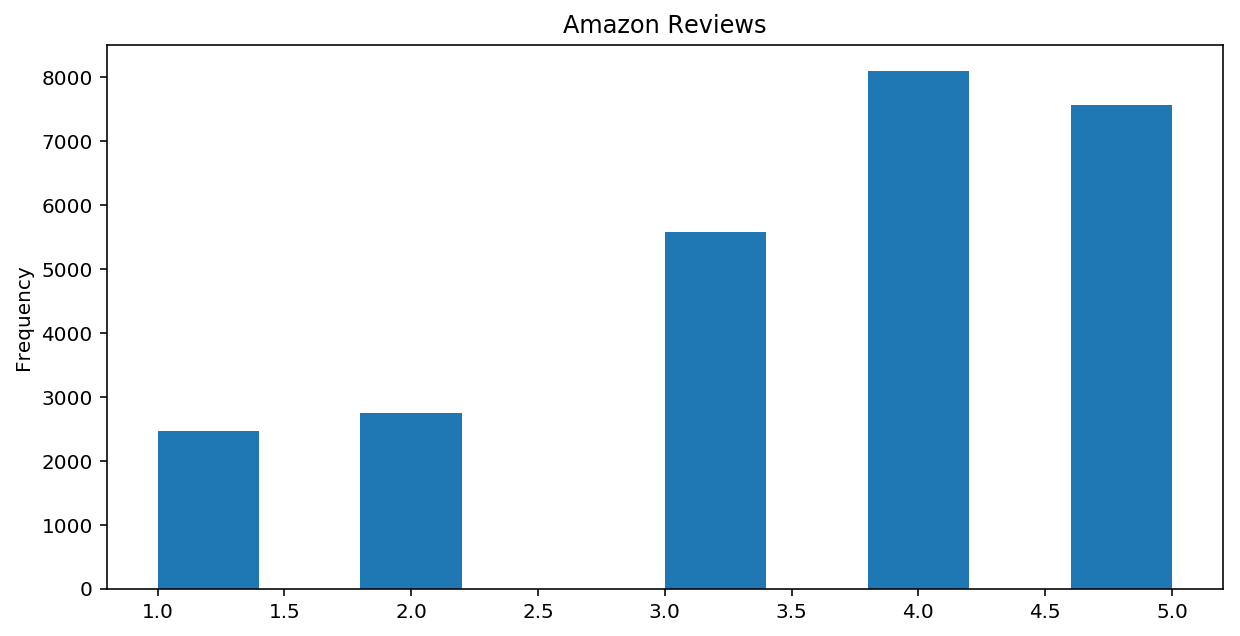

In [24]:
plt.figure(figsize=(10,5))
plt.title('Amazon Reviews')
df[df['company'] == 'amazon']['overall_ratings'].plot(kind="hist");

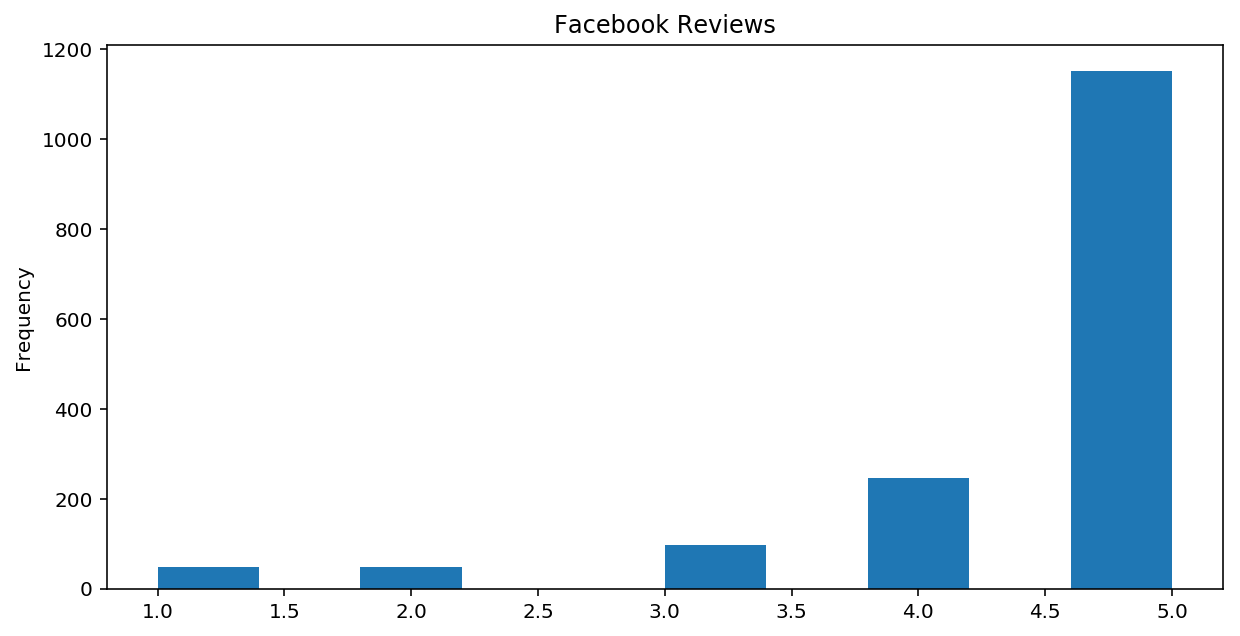

In [25]:
plt.figure(figsize=(10,5))
plt.title('Facebook Reviews')
df[df['company'] == 'facebook']['overall_ratings'].plot(kind="hist");

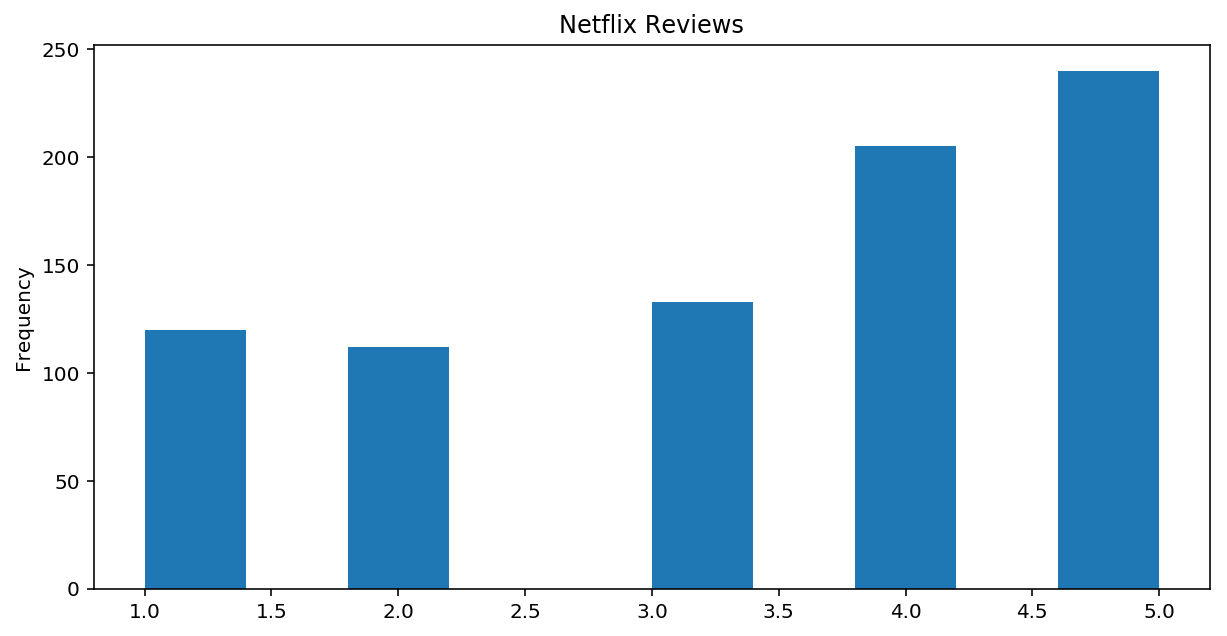

In [26]:
plt.figure(figsize=(10,5))
plt.title('Netflix Reviews')
df[df['company'] == 'netflix']['overall_ratings'].plot(kind="hist");

In [27]:
num_reviews=df['company'].value_counts()

In [28]:
#code from Gautam Chauhan
counts = df['company'].value_counts()
counts = pd.DataFrame(counts)
trace1 = go.Bar(
                x = counts.index,
                y = counts.company,
                name = "Number of reviews for each company",
                marker = dict(color='rgb(26, 118, 255)',
                             line=dict(color='black',width=1.5)),
                text = counts.company)
data = [trace1]
layout = go.Layout(barmode = "group",title='Number of Reviews of Each Company')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [29]:
df.head(2)

,company,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count
0,google,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4.0,5.0,5.0,4.0,5.0,0
1,google,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2.0,3.0,3.0,5.0,3.0,2094


In [30]:
comp=df[['company','summary']]

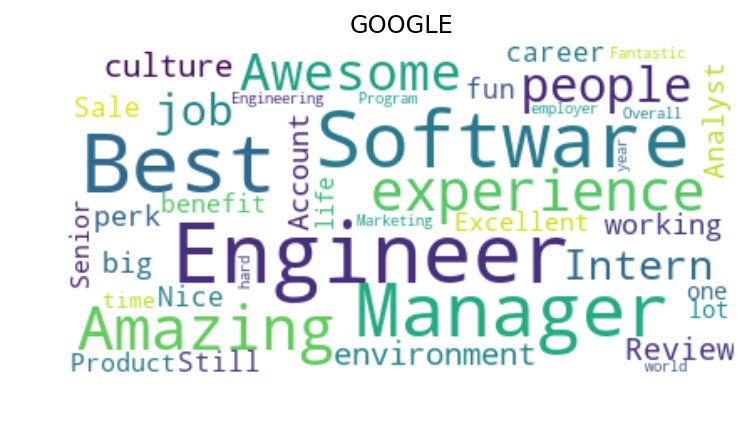

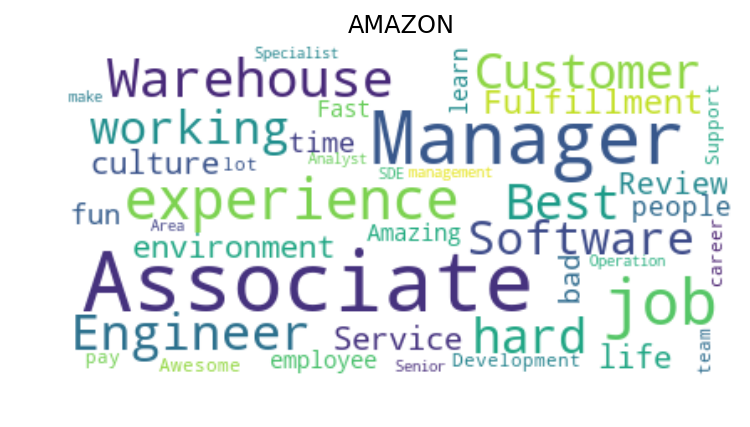

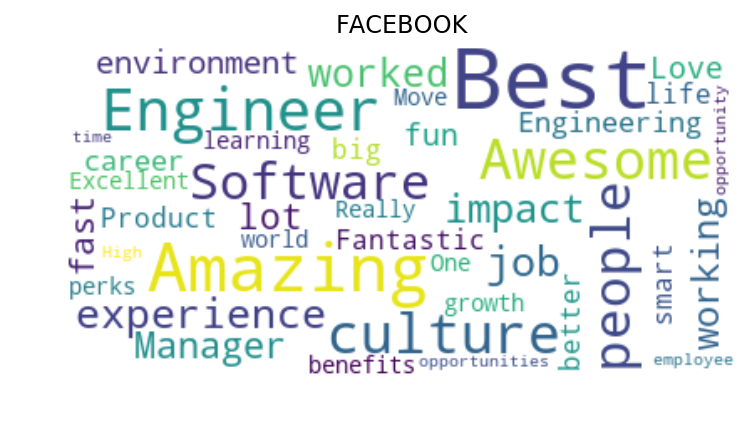

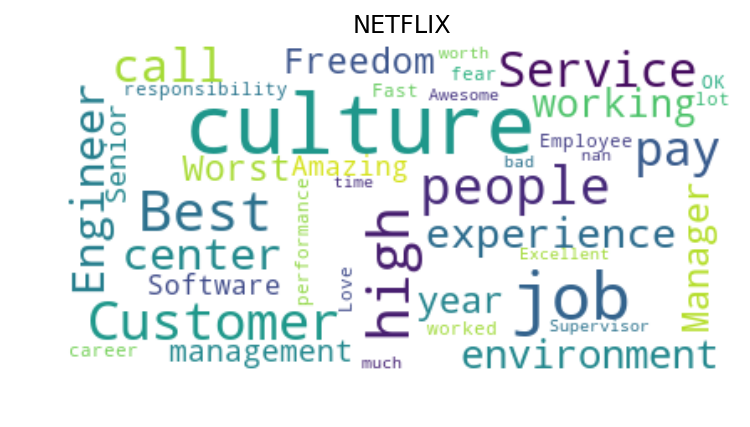

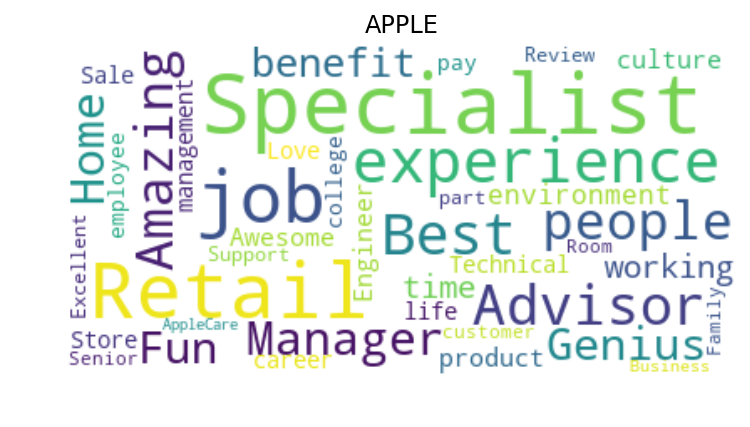

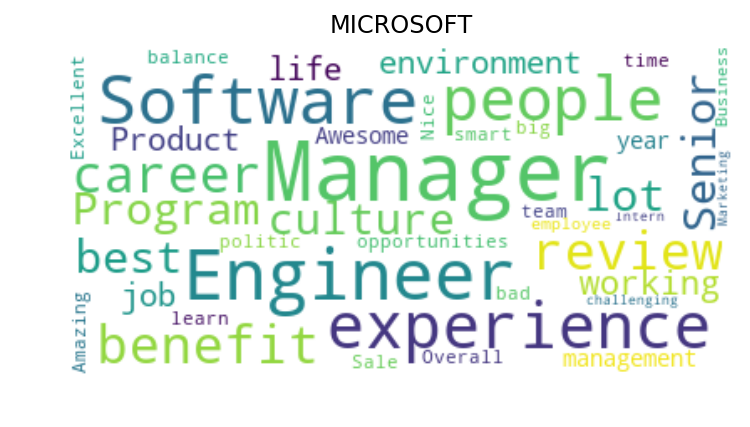

In [31]:
#code from Gautam Chauhan
#Getting wordclouds for each company
stopwords = set(STOPWORDS)
extras = ["great","work","company","place","good"]
stopwords.update(extras)
companies = list(comp.company.unique())
for company in companies:
    stopwords.add(company)

def wordclouds(df,companies):
    for company in companies:
        temp = df.loc[df["company"]==company]
        text = " ".join(str(comp) for comp in temp.summary)
        # Create and generate a word cloud image:
        wordcloud = WordCloud(stopwords=stopwords,collocations = False,max_font_size=50, max_words=40, background_color="white" ).generate(text)
        # Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(company.upper())
        plt.show()
        
wordclouds(comp,companies)


In [32]:
new_df=df[['pros', 'cons', 'overall_ratings']]

In [33]:
new_df.head()

,pros,cons,overall_ratings
0,People are smart and friendly,Bureaucracy is slowing things down,5
1,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4
2,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5
3,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5
4,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5


In [34]:
new_df["liked"] = [1 if i >=3 else 0 for i in new_df.overall_ratings]

/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [35]:
new_df.head()

,pros,cons,overall_ratings,liked
0,People are smart and friendly,Bureaucracy is slowing things down,5,1
1,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4,1
2,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5,1
3,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5,1
4,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5,1


In [36]:
new_df['pros'].isnull().sum()

0

In [37]:
new_df['cons'].isnull().sum()

0

In [38]:
new_df['overall_ratings'].isnull().sum()

0

In [39]:
new_df['overall_ratings'].value_counts()

5    23190
4    22498
3    12653
2     5282
1     3906
Name: overall_ratings, dtype: int64

In [40]:
new_df['liked'].value_counts(normalize=True)

1    0.86394
0    0.13606
Name: liked, dtype: float64

In [41]:
pros_df=new_df[['pros','liked']]

In [42]:
cons_df=new_df[['cons','liked']]

In [43]:
pros_df.head()

,pros,liked
0,People are smart and friendly,1
1,"1) Food, food, food. 15+ cafes on main campus ...",1
2,"* If you're a software engineer, you're among ...",1
3,You can't find a more well-regarded company th...,1
4,Google is a world of its own. At every other c...,1


In [44]:
cons_df.head()

,cons,liked
0,Bureaucracy is slowing things down,1
1,1) Work/life balance. What balance? All those ...,1
2,"* It *is* becoming larger, and with it comes g...",1
3,I live in SF so the commute can take between 1...,1
4,"If you don't work in MTV (HQ), you will be giv...",1


In [45]:
#pros_df= re.sub('[^a-zA-Z]', ' ', pros_df['pros'][1])

In [46]:
#pros_df

In [47]:
#tokenizer = RegexpTokenizer(r'\w+')

In [48]:
#pros_tokens = tokenizer.tokenize(pros_df.lower())

In [49]:
#pros_tokens

In [50]:
#p_stemmer = PorterStemmer()

In [51]:
#stem_pros = [p_stemmer.stem(i) for i in pros_tokens]

In [52]:
#stem_pros

In [53]:
#list(zip(pros_tokens, stem_pros))

In [54]:
#print the only the words that are diffrent 
#for i in range(len(pros_tokens)):
#    if pros_tokens[i] != stem_pros[i]:
#        print((pros_tokens[i], stem_pros[i]))

In [55]:
#stopwords_en = stopwords.words('english')

In [56]:
pros_df=new_df[['pros','liked']]

In [57]:
com = re.sub('[^a-zA-Z]', ' ', pros_df['pros'][1])
com

'   Food  food  food      cafes on main campus  MTV  alone  Mini kitchens  snacks  drinks  free breakfast lunch dinner  all day  errr day      Benefits perks  Free      gym access  on MTV campus   Free  self service  laundry  washer dryer  available  Bowling alley  Volley ball pit  Custom built and exclusive employee use only outdoor sport park  MTV   Free health fitness assessments  Dog friendly  Etc  etc  etc      Compensation  In       or       Google updated its compensation packages so that they were more competitive      For the size of the organization    K    it has remained relatively innovative  nimble  and fast paced and open with communication but  that is definitely changing  for the worse       With so many departments  focus areas  and products   in theory   you should have plenty of opportunity to grow your career  horizontally or vertically   In practice  not true      You get to work with some of the brightest  most innovative and hard working diligent minds in the in

In [58]:
# Conversion all letters to lower case 
com = com.lower()
com

'   food  food  food      cafes on main campus  mtv  alone  mini kitchens  snacks  drinks  free breakfast lunch dinner  all day  errr day      benefits perks  free      gym access  on mtv campus   free  self service  laundry  washer dryer  available  bowling alley  volley ball pit  custom built and exclusive employee use only outdoor sport park  mtv   free health fitness assessments  dog friendly  etc  etc  etc      compensation  in       or       google updated its compensation packages so that they were more competitive      for the size of the organization    k    it has remained relatively innovative  nimble  and fast paced and open with communication but  that is definitely changing  for the worse       with so many departments  focus areas  and products   in theory   you should have plenty of opportunity to grow your career  horizontally or vertically   in practice  not true      you get to work with some of the brightest  most innovative and hard working diligent minds in the in

In [59]:
# Splitting word by word 
com = com.split()
com

['food',
 'food',
 'food',
 'cafes',
 'on',
 'main',
 'campus',
 'mtv',
 'alone',
 'mini',
 'kitchens',
 'snacks',
 'drinks',
 'free',
 'breakfast',
 'lunch',
 'dinner',
 'all',
 'day',
 'errr',
 'day',
 'benefits',
 'perks',
 'free',
 'gym',
 'access',
 'on',
 'mtv',
 'campus',
 'free',
 'self',
 'service',
 'laundry',
 'washer',
 'dryer',
 'available',
 'bowling',
 'alley',
 'volley',
 'ball',
 'pit',
 'custom',
 'built',
 'and',
 'exclusive',
 'employee',
 'use',
 'only',
 'outdoor',
 'sport',
 'park',
 'mtv',
 'free',
 'health',
 'fitness',
 'assessments',
 'dog',
 'friendly',
 'etc',
 'etc',
 'etc',
 'compensation',
 'in',
 'or',
 'google',
 'updated',
 'its',
 'compensation',
 'packages',
 'so',
 'that',
 'they',
 'were',
 'more',
 'competitive',
 'for',
 'the',
 'size',
 'of',
 'the',
 'organization',
 'k',
 'it',
 'has',
 'remained',
 'relatively',
 'innovative',
 'nimble',
 'and',
 'fast',
 'paced',
 'and',
 'open',
 'with',
 'communication',
 'but',
 'that',
 'is',
 'definite

In [60]:
# Loading stopwords
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:

ps = PorterStemmer()

In [62]:
# Cleaning the stop words
# In here, we use set function because set is unordered and same element within set passes only one time.
com = [ps.stem(word) for word in com if not word in set(stopwords.words('english'))]
com

['food',
 'food',
 'food',
 'cafe',
 'main',
 'campu',
 'mtv',
 'alon',
 'mini',
 'kitchen',
 'snack',
 'drink',
 'free',
 'breakfast',
 'lunch',
 'dinner',
 'day',
 'errr',
 'day',
 'benefit',
 'perk',
 'free',
 'gym',
 'access',
 'mtv',
 'campu',
 'free',
 'self',
 'servic',
 'laundri',
 'washer',
 'dryer',
 'avail',
 'bowl',
 'alley',
 'volley',
 'ball',
 'pit',
 'custom',
 'built',
 'exclus',
 'employe',
 'use',
 'outdoor',
 'sport',
 'park',
 'mtv',
 'free',
 'health',
 'fit',
 'assess',
 'dog',
 'friendli',
 'etc',
 'etc',
 'etc',
 'compens',
 'googl',
 'updat',
 'compens',
 'packag',
 'competit',
 'size',
 'organ',
 'k',
 'remain',
 'rel',
 'innov',
 'nimbl',
 'fast',
 'pace',
 'open',
 'commun',
 'definit',
 'chang',
 'wors',
 'mani',
 'depart',
 'focu',
 'area',
 'product',
 'theori',
 'plenti',
 'opportun',
 'grow',
 'career',
 'horizont',
 'vertic',
 'practic',
 'true',
 'get',
 'work',
 'brightest',
 'innov',
 'hard',
 'work',
 'dilig',
 'mind',
 'industri',
 'con',
 'see']

In [63]:
com = ' '.join(com)
com

'food food food cafe main campu mtv alon mini kitchen snack drink free breakfast lunch dinner day errr day benefit perk free gym access mtv campu free self servic laundri washer dryer avail bowl alley volley ball pit custom built exclus employe use outdoor sport park mtv free health fit assess dog friendli etc etc etc compens googl updat compens packag competit size organ k remain rel innov nimbl fast pace open commun definit chang wors mani depart focu area product theori plenti opportun grow career horizont vertic practic true get work brightest innov hard work dilig mind industri con see'

In [64]:
#code 
pros_result = []
for i in range(67529):
    com = re.sub('[^a-zA-Z]', ' ', pros_df['pros'][i])
    com = com.lower()
    com = com.split()
    com = [ps.stem(word) for word in com if not word in set(stopwords.words('english'))]
    com = ' '.join(com)
    pros_result.append(com)

In [82]:
#pros_result

['peopl smart friendli',
 'food food food cafe main campu mtv alon mini kitchen snack drink free breakfast lunch dinner day errr day benefit perk free gym access mtv campu free self servic laundri washer dryer avail bowl alley volley ball pit custom built exclus employe use outdoor sport park mtv free health fit assess dog friendli etc etc etc compens googl updat compens packag competit size organ k remain rel innov nimbl fast pace open commun definit chang wors mani depart focu area product theori plenti opportun grow career horizont vertic practic true get work brightest innov hard work dilig mind industri con see',
 'softwar engin among king hill googl engin driven compani without doubt chang still engin focus perk amaz ye free breakfast lunch dinner everi weekday aaaaaamaz holiday parti waldorf astoria ny public librari moma etc overnight ski trip vermont overnight natur trip pocono summer summer picnic chelsea pier see go away unless compani start hurt financi speak compani quit w

In [65]:
cons_result = []
for i in range(67529):
    com = re.sub('[^a-zA-Z]', ' ', cons_df['cons'][i])
    com = com.lower()
    com = com.split()
    com = [ps.stem(word) for word in com if not word in set(stopwords.words('english'))]
    com = ' '.join(com)
    cons_result.append(com)

In [69]:
#cons_result

In [71]:
#pros_df

In [74]:
X= cons_result
y= pros_df[['liked']]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [77]:
#using pipleline our code looks clean and organized. 
pipe = Pipeline([
    ('cvec', CountVectorizer()), #instenciate count vectorizer  
    ('lr', LogisticRegression()) #and logistic regression
])

In [79]:
#giving the preameters for count vectorizer
pipe_params = {
    # adjusting features to reduce variance 
    'cvec__max_features': [2000,2500, 3000,3500],
    # trying stopwords and none
    'cvec__stop_words': [None, 'english'],
    #ignore terms that appear in more than 2, 3,4 documents. trying to find the best fit 
    'cvec__min_df': [2,3,4],
    #ignore terms that appear in more than 50% of the documents and so on. trying to find the best one
    'cvec__max_df': [.5,.9 ,.95],
    # ngram (1,1) looks only one word and 1,2 looks that word with a word before and after 
    #so we try both to get the best peramtert
    'cvec__ngram_range': [(1,1), (1,2)]
}
pros = GridSearchCV(pipe, param_grid=pipe_params, cv=3)#using Grid search fit and score our model
pros.fit(X_train, y_train)
print(f' CV Logistic Regression:  {pros.best_score_}')
pros.best_params_ #using best_prams getting the best premeters and score

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataCo

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/anaconda3/envs/dsi/lib/python3.7/site-packa

 CV Logistic Regression:  0.8861904197764878


{'cvec__max_df': 0.5,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [81]:
#priinting the scores for test and train data
print (f'CV nb Train Score :{pros.score(X_train, y_train)}') 
print (f'CV nb Test Score  :{pros.score(X_test, y_test)}')

CV nb Train Score :0.9022430201792837
CV nb Test Score  :0.8833738079725167
